# 1 - Introducão

*Este projeto teve como intuito responder as seguintes questões.*

*   Origens e destinos dos produtos;
*   Preço dos pedidos e como o frete impacta o valor final;
*    Categorias dos produtos vendidos.

*E a criação de um modelo de machine learning para previsão do faturamento nos próximos trimestres.*


## 1.1 - Módulos

*Além dos módulos utilizados, foi utilizado uma personalização externa:*

**"personalestilo-1.mplstyle"**

In [12]:
import pandas as pd
import plotly.express as px
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

from collections import Counter
import matplotlib as mpl


#Normalização dos dados
from sklearn.preprocessing import MinMaxScaler

#Seleção de variáveis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

#Divisão de dados
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#Otimização Performance com Métodos Ensemble
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import matplotlib.gridspec as gridspec

#Estilização MatPlotLib
plt.style.use("personalestilo-1.mplstyle")

import warnings
warnings.filterwarnings('ignore')

#2 - Ajustes sobre o DataFrame

*Para abrir os arquivos .csv foi utilizado como separador " , ", pois o default é " ; ".*

*Descrição das variáveis uitilizadas no dataset*

*  order_id	-- Identificador único do pedido
*  product_id --	Identificador único do produto
*  seller_id --	Identificador único do vendedor
*  customer_id	--	Identificador único do cliente
*  price	--	Preço do item
*  freight_value	--	Valor do frete do item
*  order_delivered_customer_date --Data real da entrega ao cliente
*  order_estimated_delivery_date	--	Data de entrega estimada informada ao cliente
*  seller_city	--	Cidade do vendedor
*  seller_state	--	Estado do vendedor
*  customer_city	--	Cidade do cliente
*  customer_state	--	Estado do cliente
*  product_id	--	Identificador único do produto
*  product_category_name	--	Nome da categoria (nicho) do produto

In [13]:
df_ordens = pd.read_csv('olist_orders.csv',sep=",")
df_ordens.head()

,order_id,product_id,seller_id,customer_id,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,seller_city,seller_state,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.90,13.29,2017-09-20 23:43:48,2017-09-29 00:00:00,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,239.90,19.93,2017-05-12 16:04:24,2017-05-15 00:00:00,sao paulo,SP,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,199.00,17.87,2018-01-22 13:19:16,2018-02-05 00:00:00,borda da mata,MG,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,12.99,12.79,2018-08-14 13:32:39,2018-08-20 00:00:00,franca,SP,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,199.90,18.14,2017-03-01 16:42:31,2017-03-17 00:00:00,loanda,PR,varzea paulista,SP


In [14]:
df_produtos = pd.read_csv('olist_products.csv',sep=",")
df_produtos.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


*Foi realizado uma união nos dois dataset pela chave primária **product_id** .*

In [15]:
df_prod_ord = pd.merge(df_ordens, df_produtos, on="product_id")

In [16]:
df_prod_ord.head()

,order_id,product_id,seller_id,customer_id,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,seller_city,seller_state,customer_city,customer_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.9,13.29,2017-09-20 23:43:48,2017-09-29 00:00:00,volta redonda,SP,campos dos goytacazes,RJ,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,e6eecc5a77de221464d1c4eaff0a9b64,55.9,17.96,2017-07-13 20:39:29,2017-07-26 00:00:00,volta redonda,SP,jatai,GO,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,4ef55bf80f711b372afebcb7c715344a,64.9,18.33,2018-06-04 18:34:26,2018-06-07 00:00:00,volta redonda,SP,belo horizonte,MG,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,30407a72ad8b3f4df4d15369126b20c9,58.9,16.17,2017-08-09 21:26:33,2017-08-25 00:00:00,volta redonda,SP,sao jose dos pinhais,PR,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,91a792fef70ecd8cc69d3c7feb3d12da,58.9,13.29,2017-08-24 20:04:21,2017-09-01 00:00:00,volta redonda,SP,conselheiro lafaiete,MG,cool_stuff


*Após a união, foi verificado o percentual sobre os dados faltantes.*

*As duas colunas que apresentaram 2,17% e 1,42% foram retirados os registros faltantes, pois o baixo percentual não afeta o nosso dataset.*

In [17]:
df_prod_ord.isnull().sum() * 100/len(df_prod_ord)

order_id                         0.000000
product_id                       0.000000
seller_id                        0.000000
customer_id                      0.000000
price                            0.000000
freight_value                    0.000000
order_delivered_customer_date    2.178429
order_estimated_delivery_date    0.000000
seller_city                      0.000000
seller_state                     0.000000
customer_city                    0.000000
customer_state                   0.000000
product_category_name            1.422992
dtype: float64

In [18]:
df_prod_ord.dropna(inplace=True)

In [19]:
df_prod_ord.isnull().sum() * 100/len(df_prod_ord)

order_id                         0.0
product_id                       0.0
seller_id                        0.0
customer_id                      0.0
price                            0.0
freight_value                    0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
seller_city                      0.0
seller_state                     0.0
customer_city                    0.0
customer_state                   0.0
product_category_name            0.0
dtype: float64

# Dados geológicos

*Para construir um mapa geográfico de calor, foi utilizado a API GeoPy.*

*Ao passar as cidades e os estados dos clientes e dos vendedores, foi possível obter a latitude e a longitude e com isso plotar o gráfico utilizando a biblioteca folium*

In [20]:
## chama a API GeoPy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="HeatMapAuto")

In [21]:
## consulta cada endereço e converte em uma lista de coordenadas
geocodes_clientes = []
geocodes_vendedores = []

for i in range (0,10): 
    try:   
      texto_clientes = df_prod_ord['customer_city'][i]  + ", " + df_prod_ord['customer_state'][i] + " Brasil" 
      texto_vendedores = df_prod_ord['seller_city'][i]  + ", " + df_prod_ord['seller_city'][i] + " Brasil" 
      location_clientes = geolocator.geocode(texto_clientes)
      location_vendedores = geolocator.geocode(texto_vendedores)
      geocodes_clientes.append([location_clientes.latitude,location_clientes.longitude])
      geocodes_vendedores.append([location_vendedores.latitude,location_vendedores.longitude])
    except:
      #O expect foi criado, pois algumas cidades não são localizadas.
      pass

## transforma a lista em um dataframe
import numpy as np

dados_clientes = np.matrix(geocodes_clientes)
dados_vendedores = np.matrix(geocodes_vendedores)

df_cli = pd.DataFrame(dados_clientes)
df_vend = pd.DataFrame(dados_vendedores)



In [24]:
### Cria o mapa de calor 
import folium
from folium import plugins
coordenadas = []
lat = df_cli[0][:1000].values
long = df_cli[1][:1000].values


mapa = folium.Map([-18., -47.], tiles='stamentoner', zoom_start=5)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

print("Clientes\n")
mapa.add_child(plugins.HeatMap(coordenadas))

Clientes



In [25]:
### Cria o mapa de calor 

from folium import plugins
coordenadas = []
lat = df_vend[0][:1000].values
long = df_vend[1][:1000].values


mapa = folium.Map([-18., -47.], tiles='stamentoner', zoom_start=5)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

print("Vendedores\n")
mapa.add_child(plugins.HeatMap(coordenadas))

Vendedores



*Com os gráficos geográficos criados, foi possível observar a alta concentração no sudeste de vendedores, logo esse dado irá implicar sobre o valor de frete, para regiões mais longes.*

# Ajuste sobre o dataset

*Foram adicionadas duas novas colunas para dizer de qual região do País está localizado os clientes e os vendedores.*

*   NORTE;
*   NORDESTE;
*   OESTE;
*   SUDESTE;
*   SUL.


*Foi adicionado uma coluna para mostrar o ano que foi entregue ao cliente o pedido.*

*   2016;
*   2017;
*   2018.

*Foi adicionado uma coluna referente aos mêses que aconteceram as entregas.*

*Foi adicionado uma coluna referente aos trimestres, de 2016 até 2018.*

*Foi adicionao uma coluna referente ao turno do dia que foi realizado a entrega.*

 *   Manhã;
 *   Tarde;
 *   Noite;
 *   Madrugada.

*E por último foi criado uma coluna que é refente ao dia da semana que foi realizado a entrega.*



In [26]:
def regioes (cols):

  estado = cols

  reg_norte = ['AM','RR','AP','PA','TO','RO','AC']
  reg_nordeste = ['MA','PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
  reg_centro_oeste = ['MT', 'MS', 'GO','DF']
  reg_sudeste = ['SP','RJ', 'ES', 'MG']
  reg_sul = ['PR', 'RS', 'SC']
  if estado in reg_norte:
      return "NORTE"
  if estado in reg_nordeste:
      return "NORDESTE"
  if estado in reg_centro_oeste:
     return "OESTE"
  if estado in reg_sudeste:
     return "SUDESTE"
  if estado in reg_sul:
      return "SUL"
    
df_prod_ord["seller_regiao"] = df_prod_ord["seller_state"].apply(regioes)
df_prod_ord["customer_regiao"] = df_prod_ord["customer_state"].apply(regioes)

In [27]:
def anos (cols):

  date = cols
  ano = date[0:4]

  if ano == "2016":
    return 2016
  if ano == "2017":
    return 2017
  if ano == "2018":
    return 2018
    
df_prod_ord["order_ano"] = df_prod_ord["order_estimated_delivery_date"].apply(anos)

In [28]:
def meses (cols):

  date = cols
  mes = date[5:7]

  meses = ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"]
  return meses[int(mes)-1]
    
df_prod_ord["order_mes"] = df_prod_ord["order_estimated_delivery_date"].apply(meses)

In [29]:
def trimestre(cols):

  date = cols
  ano = date[0:4]
  mes = date[5:7]

  if ((ano == "2016") and ( 1 <= int(mes) < 4)):
    return "2016/1"
  if ((ano == "2016") and ( 4 <= int(mes) < 7)):
    return "2016/2"
  if ((ano == "2016") and ( 7 <= int(mes) < 10)):
    return "2016/3"
  if ((ano == "2016") and ( 10 <= int(mes) <= 12)):
    return "2016/4"

  if ((ano == "2017") and ( 1 <= int(mes) < 4)):
    return "2017/1"
  if ((ano == "2017") and ( 4 <= int(mes) < 7)):
    return "2017/2"
  if ((ano == "2017") and ( 7 <= int(mes) < 10)):
    return "2017/3"
  if ((ano == "2017") and ( 10 <= int(mes) <= 12)):
    return "2017/4"

  if ((ano == "2018") and ( 1 <= int(mes) < 4)):
    return "2018/1"
  if ((ano == "2018") and ( 4 <= int(mes) < 7)):
    return "2018/2"
  if ((ano == "2018") and ( 7 <= int(mes) < 10)):
    return "2018/3"
  if ((ano == "2018") and ( 10 <= int(mes) <= 12)):
    return "2018/4"
    
df_prod_ord["order_trimestre"] = df_prod_ord["order_estimated_delivery_date"].apply(trimestre)

In [30]:
def periodo (cols):
  date = cols
  horario = date[11:13]

  manha = ['07','08','09','10','11']
  tarde = ['12','13','14','15','16','17']
  noite = ['18','19','20', '21','22','23','00']
  madrugada = ['01','02', '03','04','05','06']

  if horario in manha:
    return "Manha"
  if horario in tarde:
    return "Tarde"
  if horario in noite:
    return "Noite"
  if horario in madrugada:
    return "Madrugada"

df_prod_ord["order_periodo"] = df_prod_ord["order_delivered_customer_date"].apply(periodo)

In [31]:
import datetime
from datetime import date

def dia_semana(cols):
  
  date_time_str = cols

  dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
  date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
  dia_semana = dias[date_time_obj.weekday()]

  return dia_semana


df_prod_ord["order_dia_semana"] = df_prod_ord["order_delivered_customer_date"].apply(dia_semana)


In [32]:
df_prod_ord.head()

,order_id,product_id,seller_id,customer_id,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,seller_city,seller_state,customer_city,customer_state,product_category_name,seller_regiao,customer_regiao,order_ano,order_mes,order_trimestre,order_periodo,order_dia_semana
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.9,13.29,2017-09-20 23:43:48,2017-09-29 00:00:00,volta redonda,SP,campos dos goytacazes,RJ,cool_stuff,SUDESTE,SUDESTE,2017,Set,2017/3,Noite,Quarta
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,e6eecc5a77de221464d1c4eaff0a9b64,55.9,17.96,2017-07-13 20:39:29,2017-07-26 00:00:00,volta redonda,SP,jatai,GO,cool_stuff,SUDESTE,OESTE,2017,Jul,2017/3,Noite,Quinta
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,4ef55bf80f711b372afebcb7c715344a,64.9,18.33,2018-06-04 18:34:26,2018-06-07 00:00:00,volta redonda,SP,belo horizonte,MG,cool_stuff,SUDESTE,SUDESTE,2018,Jun,2018/2,Noite,Segunda
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,30407a72ad8b3f4df4d15369126b20c9,58.9,16.17,2017-08-09 21:26:33,2017-08-25 00:00:00,volta redonda,SP,sao jose dos pinhais,PR,cool_stuff,SUDESTE,SUL,2017,Ago,2017/3,Noite,Quarta
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,91a792fef70ecd8cc69d3c7feb3d12da,58.9,13.29,2017-08-24 20:04:21,2017-09-01 00:00:00,volta redonda,SP,conselheiro lafaiete,MG,cool_stuff,SUDESTE,SUDESTE,2017,Set,2017/3,Noite,Quinta


#Sub-Tabela - Frequência por Trimestre

*Foi criado um sub-set, que calcula a frequência de pedidos realizados por região em função do tempo (Trimestre).*

*Foi realizado um sub-set para os clientes e para os vendedores*

In [33]:
df_ocorrencias_vend = pd.DataFrame(columns=["Trimestre","Frequência","Regiao"])
df_ocorrencias_cli = pd.DataFrame(columns=["Trimestre","Frequência","Regiao"])

for x in df_prod_ord['seller_regiao'].unique():
  contagem_total = sorted(df_prod_ord[df_prod_ord['seller_regiao'] == x]["order_trimestre"])
  dic_cont = Counter(contagem_total)
  for i in dic_cont:
    df_ocorrencias_vend.loc[len(df_ocorrencias_vend)] = [str(i),int(dic_cont[i]),str(x)]


for x in df_prod_ord['customer_regiao'].unique():
  contagem_total = sorted(df_prod_ord[df_prod_ord['customer_regiao'] == x]["order_trimestre"])
  dic_cont = Counter(contagem_total)
  for i in dic_cont:
    df_ocorrencias_cli.loc[len(df_ocorrencias_cli)] = [str(i),int(dic_cont[i]),str(x)]


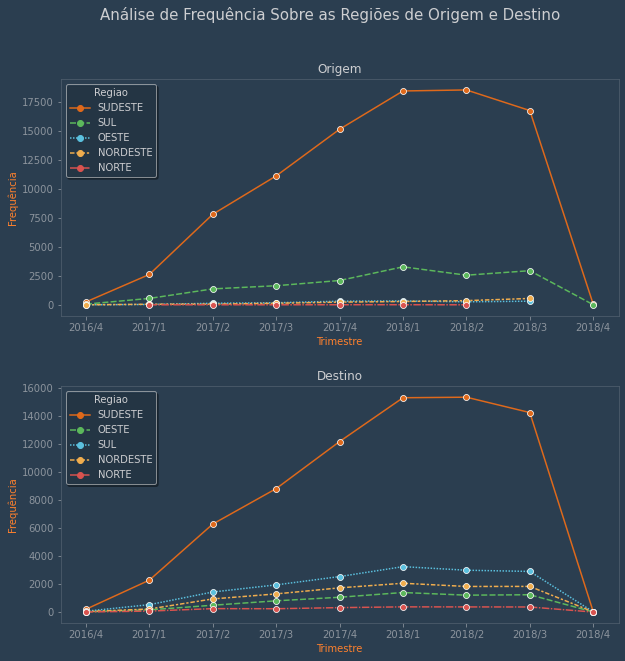

In [34]:
plt.figure(figsize=(10,10))
G = gridspec.GridSpec(2,1,hspace=0.3)
plt.suptitle("Análise de Frequência Sobre as Regiões de Origem e Destino",fontsize=15)

# ============================ PLOT 1 ====================================
axes_1 = plt.subplot(G[0,0])
sns.lineplot(data=df_ocorrencias_vend,
             x="Trimestre",
             y=df_ocorrencias_vend["Frequência"].astype(float),
             hue="Regiao",
             ax= axes_1,
             markers=['o']*5,style="Regiao")
plt.title("Origem")

# ============================ PLOT 2 ====================================
axes_2 = plt.subplot(G[1,0])
sns.lineplot(data=df_ocorrencias_cli,
             x="Trimestre",
             y=df_ocorrencias_cli["Frequência"].astype(float),
             hue="Regiao",
             ax= axes_2,
             markers=['o']*5,
             style="Regiao")
plt.title("Destino")


plt.show()

*Ao observar os gráficos acima, é possível confirmar os gráficos geográficos, onde apresentou uma alta concentração de vendedores localizados no Sudeste e no SUL.*

*Porém, é possível observar um aumento gradativo na quantidade de clientes aparecendo em regiões que não apresentam quantidades significativas de vendedores, por exemplo, Nordeste e Oeste.*

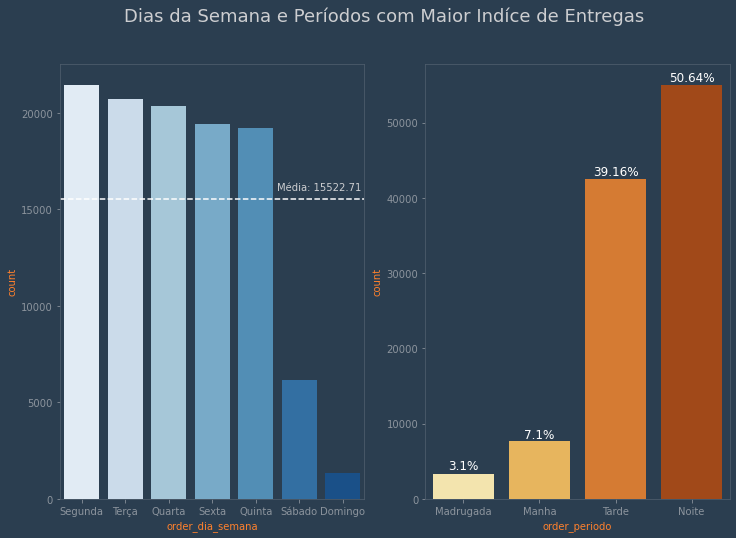

In [35]:
plt.figure(figsize=(12,8))
G = gridspec.GridSpec(1,2,hspace=0.3)
plt.suptitle("Dias da Semana e Períodos com Maior Indíce de Entregas",fontsize=18)

# ============================ PLOT 1 ====================================
axes_1 = plt.subplot(G[0,0])

sns.countplot(df_prod_ord["order_dia_semana"], palette="Blues",order=df_prod_ord['order_dia_semana'].value_counts().sort_values(ascending=False).index)

axes_1.axhline(y=df_prod_ord["order_dia_semana"].value_counts().mean(),xmin=0,xmax=1,color="#ffffff",linestyle='--')

axes_1.text(4.5,16000,"Média: "+str(round(df_prod_ord["order_dia_semana"].value_counts().mean(),2)))

# ============================ PLOT 2 ====================================
axes_2 = plt.subplot(G[0,1])

percentual_noite = df_prod_ord["order_periodo"].value_counts()[0]*100/len(df_prod_ord["order_periodo"])
percentual_tarde = df_prod_ord["order_periodo"].value_counts()[1]*100/len(df_prod_ord["order_periodo"])
percentual_manha = df_prod_ord["order_periodo"].value_counts()[2]*100/len(df_prod_ord["order_periodo"])
percentual_madrugada = df_prod_ord["order_periodo"].value_counts()[3]*100/len(df_prod_ord["order_periodo"])

sns.countplot(x=df_prod_ord["order_periodo"], palette="YlOrBr",order=df_prod_ord['order_periodo'].value_counts().sort_values().index)
axes_2.text(3, 55500, str(round(percentual_noite, 2))+'%', fontsize=12, color='#ffffff', ha='center')
axes_2.text(2, 43000, str(round(percentual_tarde, 2))+'%', fontsize=12, color='#ffffff', ha='center')
axes_2.text(1, 8000, str(round(percentual_manha, 2))+'%', fontsize=12, color='#ffffff', ha='center')
axes_2.text(0, 4000, str(round(percentual_madrugada, 2))+'%', fontsize=12, color='#ffffff', ha='center')

plt.show()

*Foi analisado com qual frequência da semana e em qual período apresentava os maiores indices de eentrega.*

*De segunda a sexta, os dados apresentaram valores acima da média de entregas. Porém, sábado e domingo apresentou valores abaixo da média devido ao hórario de funcionamento da empresa para realizar as entregas.*

*Mas ao observar os turnos referentes as entregas, o turno da noite apresentou maior frequência, cerca de 51%. Enquanto o turno da manhã apresentou 7,1%.*

#Sub-Tabela - Faturamento por Trimestre

*Foi criado um sub-set, que calcula o faturamento total em função do tempo (Trimestre).*

In [36]:
df_faturamento_trimestre = pd.DataFrame(columns=["Faturamento","Frequência"])

for x in sorted(df_prod_ord["order_trimestre"].unique()):
  lista_faturamento = round(sum(df_prod_ord[df_prod_ord['order_trimestre'] == x]["price"]),2)
  df_faturamento_trimestre.loc[len(df_faturamento_trimestre)] = [str(x),lista_faturamento]

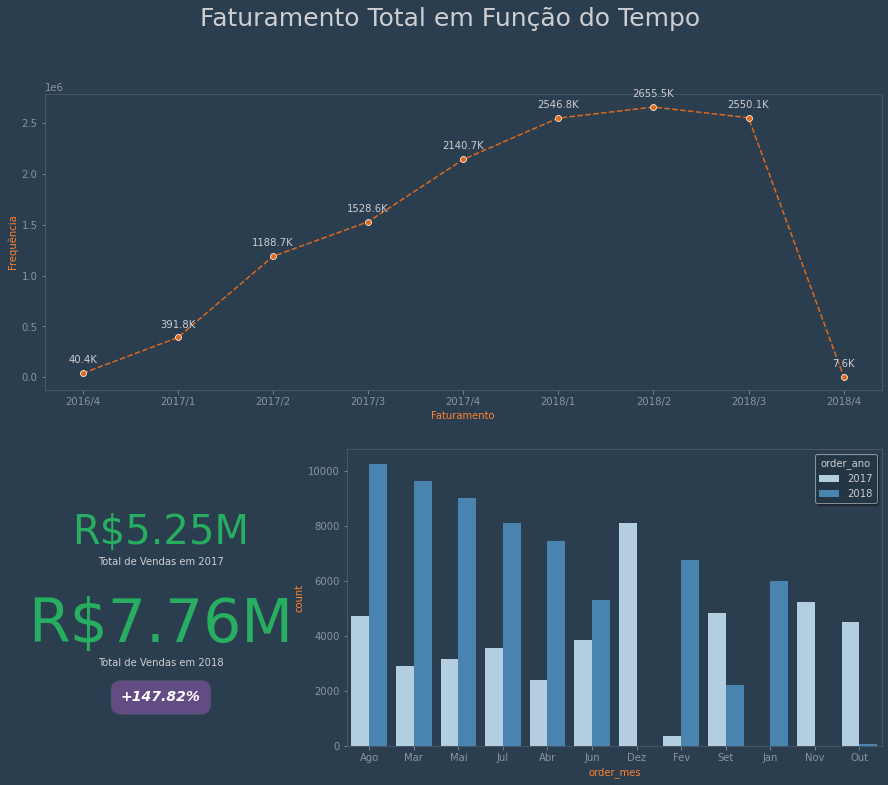

In [37]:
plt.figure(constrained_layout=True, figsize=(15, 12))
G = gridspec.GridSpec(2, 3,wspace=0.3)
plt.suptitle("Faturamento Total em Função do Tempo",fontsize=25)

# ============================ PLOT 1 ====================================
axes_1 = plt.subplot(G[0,:])

sns.lineplot(data=df_faturamento_trimestre,
             x="Faturamento",
             y=df_faturamento_trimestre["Frequência"].astype(float),
             ax= axes_1,linestyle='--',marker='o')

axes_1.set_yticks(np.arange(0, 2700000, 500000))
for x, y in df_faturamento_trimestre["Frequência"].items():
    axes_1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 10),ha='center')

# ============================ PLOT 2 ====================================
axes_2 = plt.subplot(G[1,0])

faturamento_2017 = round(sum(df_prod_ord[df_prod_ord['order_ano'] == 2017]["price"]),2)
faturamento_2018 = round(sum(df_prod_ord[df_prod_ord['order_ano'] == 2018]["price"]),2)
percentual = faturamento_2018 * 100 / faturamento_2017

axes_2.text(0.50, 0.68, 'R$' + str(round(faturamento_2017/1000000, 2)) + 'M', fontsize=40, color='#27ae60', ha='center')
axes_2.text(0.50, 0.61, 'Total de Vendas em 2017', fontsize=10, ha='center')

axes_2.text(0.50, 0.35, 'R$' + str(round(faturamento_2018/1000000, 2)) + 'M', fontsize=60, color='#27ae60', ha='center')
axes_2.text(0.50, 0.27, 'Total de Vendas em 2018', fontsize=10, ha='center')

sinal = '+' if percentual > 0 else '-'
axes_2.text(0.50, 0.15, f'{sinal}{str(round(percentual, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='#9b59b6', alpha=0.5, pad=10, boxstyle='round, pad=.7'))

plt.axis('off')

# ============================ PLOT 3 ====================================
axes_3 = plt.subplot(G[1,1:])

filter = df_prod_ord[df_prod_ord["order_ano"] != 2016]

sns.countplot(x=filter["order_mes"],hue=filter["order_ano"], palette="Blues",order=filter["order_mes"].value_counts().sort_values(ascending=False).index)

plt.show()

*É possível observar um aumento de 147% do faturamento de 2018 em relação a 2017. Sendo possível observar um crescimento quase linear a cada trimestre.*

*O pico de queda no quartro trimestre de 2018 é devido a problemas do dataset (Ruídos).*

*Mas, é possível observar alta evolução das vendas de Janeiro até Agosto em comparação do ano de 2018 e 2017.*

#Sub-Tabela - Removendo Outliers

*Neste sub-set foi realizado a remoção dos quartils abaixo de 25% e acima de 75% sobre os valores de preço. O intuito é observar o comportamento dos preços e dos fretes em cada estado*

In [38]:
#Removendo outliers

Q1 = df_prod_ord['price'].quantile(0.25)
Q3 = df_prod_ord['price'].quantile(0.75)
IQR = Q3 - Q1  

removendo_outliers = (df_prod_ord['price'] >= Q1 - 1.5 * IQR) & (df_prod_ord['price'] <= Q3 + 1.5 *IQR)

df_sem_outliers = df_prod_ord.loc[removendo_outliers] 

In [39]:
#Preço médio e frete médio por estado

precos_medios = []
fretes_medios = []
estados = df_sem_outliers["customer_state"].unique()
for estado in estados:
    valor_price = df_sem_outliers[df_sem_outliers["customer_state"]== estado]["price"].mean()
    valor_frete = df_sem_outliers[df_sem_outliers["customer_state"]== estado]["freight_value"].mean()
    precos_medios.append(valor_price)
    fretes_medios.append(valor_frete)


In [40]:
#Valor frete médio por região.

df_frete_regiao = pd.DataFrame(columns=["Regiao","Frete"])

for x in df_sem_outliers["customer_regiao"].unique():
  valor_frete_regiao = round((df_sem_outliers[df_sem_outliers["customer_regiao"] == x]["freight_value"]).mean(),2)
  df_frete_regiao.loc[len(df_frete_regiao)] = [str(x),valor_frete_regiao]


Text(0.5, 1.0, 'Valor Médio por Região')

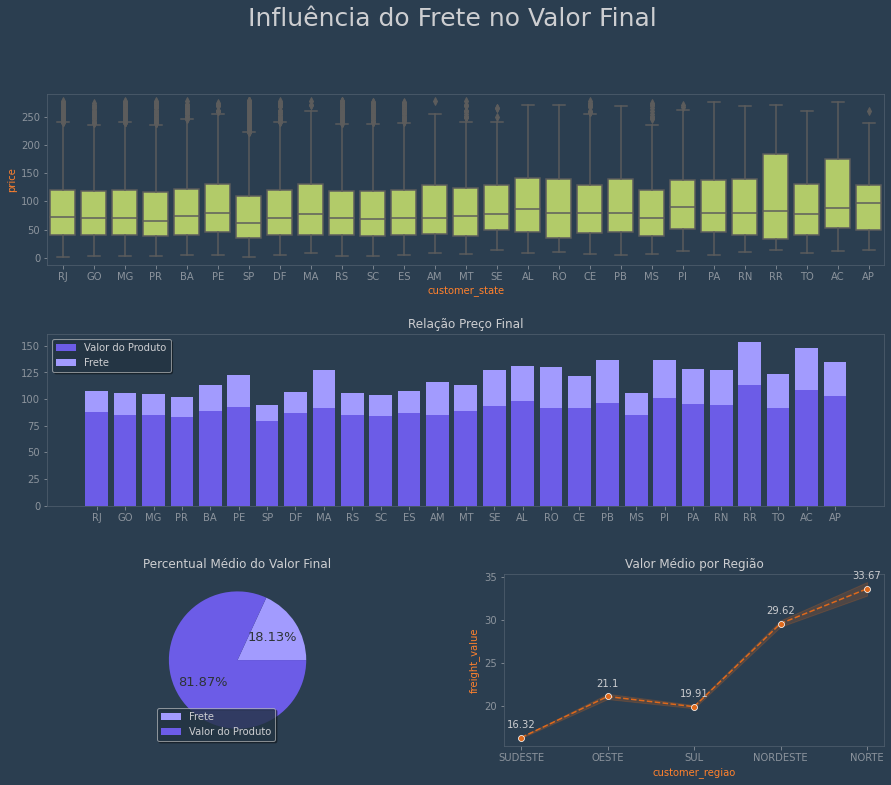

In [41]:
plt.figure(constrained_layout=True, figsize=(15, 12))
G = gridspec.GridSpec(3, 2,wspace=0.2,hspace=0.4)
plt.suptitle("Influência do Frete no Valor Final",fontsize=25)

# ============================ PLOT 1 ====================================

axes_1 = plt.subplot(G[0,:])

sns.boxplot(x="customer_state", y="price", data=df_sem_outliers, color="#badc58")

# ============================ PLOT 2 ====================================
axes_2 = plt.subplot(G[1,:])

plt.bar(x = df_sem_outliers["customer_state"].unique(), height=precos_medios, color="#6c5ce7")

plt.bar(x = df_sem_outliers["customer_state"].unique(), height=fretes_medios, bottom=precos_medios, color="#a29bfe")

plt.legend(["Valor do Produto","Frete"])
plt.title("Relação Preço Final")

# ============================ PLOT 3 ====================================
axes_3 = plt.subplot(G[2,0])

df_price_frete_geral = df_sem_outliers[["price","freight_value"]].mean()
values = [df_price_frete_geral[1],df_price_frete_geral[0]]
cores = "#a29bfe","#6c5ce7"

axes_3.pie(values,autopct='%1.2f%%', colors=cores,textprops={'fontsize': 13,'color':'#2d3436'})

axes_3.legend(["Frete","Valor do Produto"],loc="best")
plt.title("Percentual Médio do Valor Final")

# ============================ PLOT 4 ====================================
axes_4 = plt.subplot(G[2,1])

sns.lineplot(data=df_sem_outliers,
             x="customer_regiao",
             y="freight_value",
             ax= axes_4,linestyle='--',marker='o')

for x, y in df_frete_regiao["Frete"].items():
    axes_4.annotate(str(y), xy=(x, y), textcoords='offset points', xytext=(0, 10),ha='center')

plt.title("Valor Médio por Região")

*O primeiro gráfico apresenta o comportamento dos preços em relação aos estados. Mas o valor da mediana são próximos entre si.*

*Ao analisar o segundo gráfico, ele apresenta a média dos preços dos produtos em cada estado mais o valor médio dos fretes naquele estado. Apresentando maiores variações nos estados do Norte e Nordeste.*

*O terceiro gráfico é a média de todos preços e fretes de todos estados. Concluindo que o cliente paga em média 20% do valor do final em frete.*

*O último gráfico apresenta o valor médio do frete por região. Sendo possível observar que a média no Norte e Nordeste é bem maior. E isso se da ao fato de não terem vendedores naquela região. Portanto, a adição de vendedores nessas regiões aumentaria as vendas ao apresentar queda de até 50% do valor do frete.*

#Sub-Tabela - Faturamento por categoria

*Foi criado um sub-set, que calcula o faturamento total de todas as categorias. Porém, foi utilizado os 10 maiores faturamentos por categoria.*

In [42]:
df_ocorrencias_categorias_preco = pd.DataFrame(columns=["Categoria","Preço"])

for x in df_prod_ord["product_category_name"].unique():
  contagem_total = round(sum(df_prod_ord[df_prod_ord['product_category_name'] == x]['price']),2)
  df_ocorrencias_categorias_preco.loc[len(df_ocorrencias_categorias_preco)] = [str(x),contagem_total]

df_ocorrencias_categorias_preco = df_ocorrencias_categorias_preco.sort_values(["Preço"],ascending=False).head(10)

#Sub-Tabela - Quantidade de vendas por categoria

*Foi criado um sub-set, que calcula a quantidade de itens vendidos naquela categoria categorias. Porém, foi utilizado as 10 maiores quantidades de vendas por categoria.*

In [43]:
df_ocorrencias_categorias = pd.DataFrame(columns=["Categoria","Frequência"])

for x in df_prod_ord["product_category_name"].unique():
  contagem_total = df_prod_ord[df_prod_ord['product_category_name'] == x]['product_category_name']

  dic_cont = Counter(contagem_total)
  
  for i in dic_cont:
    df_ocorrencias_categorias.loc[len(df_ocorrencias_categorias)] = [str(x),dic_cont[i]]

df_ocorrencias_categorias = df_ocorrencias_categorias.sort_values(["Frequência"],ascending=False).head(10)

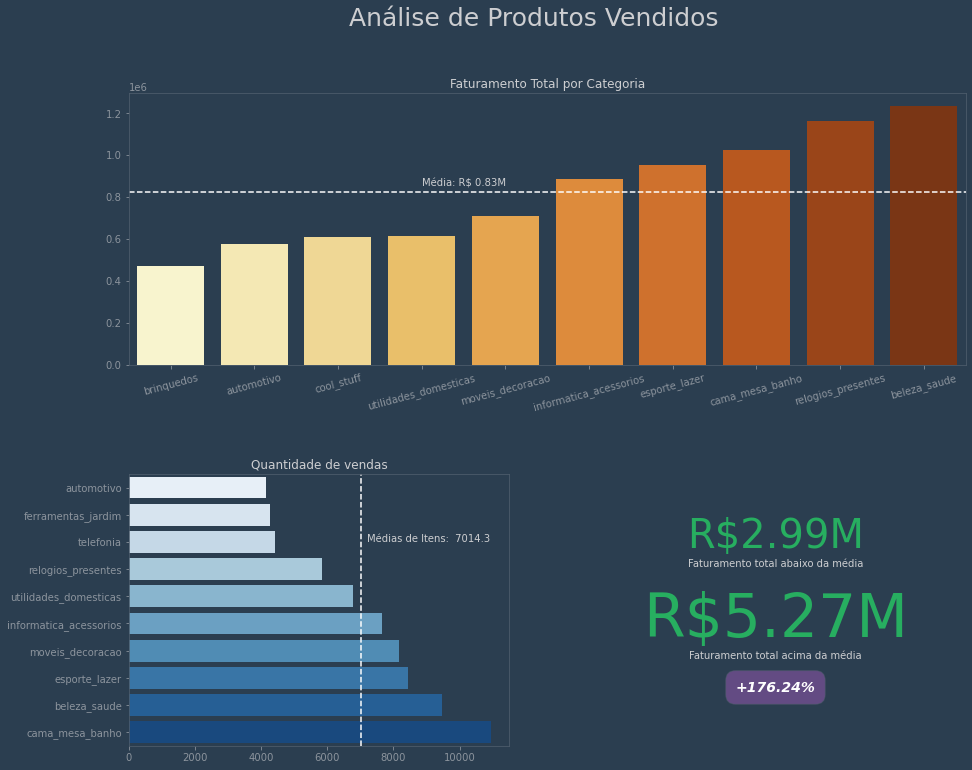

In [44]:
plt.figure(constrained_layout=True, figsize=(15, 12))
G = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.4)
plt.suptitle("Análise de Produtos Vendidos",fontsize=25)

# ============================ PLOT 1 ====================================
axes_1 = plt.subplot(G[0,:])

pairs_1 = zip(df_ocorrencias_categorias_preco.Categoria.unique(), df_ocorrencias_categorias_preco.Preço)
pairs_1= sorted(pairs_1, key=lambda x: x[1], reverse= False)
newx_1, newy_1 = zip(*pairs_1)


sns.barplot(x=list(newx_1),y=list(newy_1) , palette="YlOrBr")
plt.xticks(rotation=15)

axes_1.axhline(y=df_ocorrencias_categorias_preco.Preço.mean(),xmin=0,xmax=1,color="#ffffff",linestyle='--')

axes_1.text(3,850000,"Média: R$ "+str(round(df_ocorrencias_categorias_preco.Preço.mean()/1000000,2))+"M")


plt.title("Faturamento Total por Categoria")


# ============================ PLOT 2 ====================================
axes_2 = plt.subplot(G[1,0])

pairs_2 = zip(df_ocorrencias_categorias.Categoria.unique(), df_ocorrencias_categorias.Frequência)
pairs_2= sorted(pairs_2, key=lambda x: x[1], reverse= False)
newx_2, newy_2 = zip(*pairs_2)

sns.barplot(y=list(newx_2),x=list(newy_2), palette="Blues")
plt.title("Quantidade de vendas")

plt.axvline(x=df_ocorrencias_categorias.Frequência.mean(),color="#ffffff",linestyle='--')
axes_2.text(7200,2,"Médias de Itens:  "+str(round(df_ocorrencias_categorias.Frequência.mean(),2))+"")

# ============================ PLOT 3 ====================================
axes_3 = plt.subplot(G[1,1])

media = df_ocorrencias_categorias_preco.Preço.mean()
abaixo_media = round(sum(df_ocorrencias_categorias_preco[df_ocorrencias_categorias_preco['Preço'] < media]["Preço"]),2)
acima_media = round(sum(df_ocorrencias_categorias_preco[df_ocorrencias_categorias_preco['Preço'] >= media]["Preço"]),2)
percentual = acima_media * 100 / abaixo_media

axes_3.text(0.50, 0.73, 'R$' + str(round(abaixo_media/1000000, 2)) + 'M', fontsize=40, color='#27ae60', ha='center')
axes_3.text(0.50, 0.66, 'Faturamento total abaixo da média', fontsize=10, ha='center')

axes_3.text(0.50, 0.40, 'R$' + str(round(acima_media/1000000, 2)) + 'M', fontsize=60, color='#27ae60', ha='center')
axes_3.text(0.50, 0.32, 'Faturamento total acima da média', fontsize=10, ha='center')

sinal = '+' if percentual > 0 else '-'
axes_3.text(0.50, 0.20, f'{sinal}{str(round(percentual, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='#9b59b6', alpha=0.5, pad=10, boxstyle='round, pad=.7'))

plt.axis('off')

plt.show()

*É possível obsevar no primeiro gráfico que apenas 5 itens apresentam faturamento acima da média, sendo um faturamento total de 5.27 Milhões. Porém, ao observar o gráfico de quantidade de vendas é visto que relogios_presentes que está abaixo da média. Mas, é o segundo item com maior contribuição no faturamento.*